In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #for more visualizations

from scipy import stats #statistical tools

#import keras library to implement neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, AveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import optimizers to train data
from tensorflow.keras.optimizers import Adam

#libraries to shuffle image data
import os #uses OS commands to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples
import glob

In [2]:
#sort dataset images by age (don't need to do here, but need to sort them when choosing whether to put image in train, test, or validate)
#need to be careful of face_scre values, need to modify Nan or weird excel format to inf on labels csv file
labeled = pd.read_csv("wiki_labels.csv") #reads in csv file to make sure it looks good and use to help sort images
judged = pd.read_csv("wiki_judge.csv")
#labeled.head(20)
#judged.head()

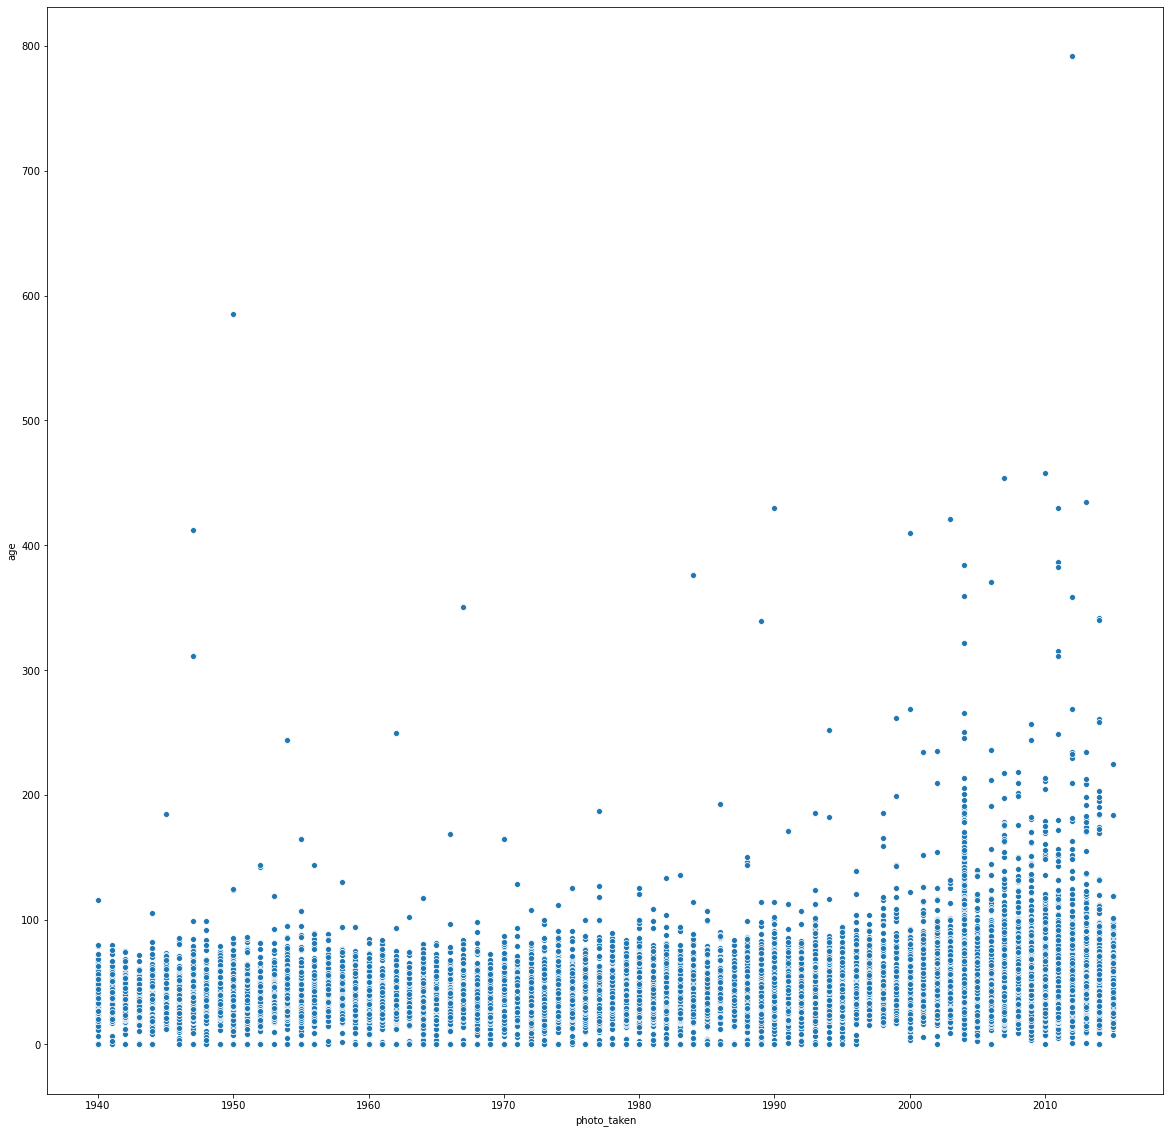

In [3]:
#observe data set
plt.figure(figsize=(20,20))
sb.scatterplot(x='photo_taken', y='age', data=labeled)

In [3]:
#get paths of datasets, assuming that the dataset folders are in the same directory as the code being run
os.chdir("wiki_labeled\\")
train_path = os.getcwd()
os.chdir("../")
os.chdir("wiki_judge_images\\")
test_path = os.getcwd()
os.chdir("../")
print(train_path)
print(test_path)

C:\Users\truon\CSCI 4931-DL\PA2\wiki_labeled
C:\Users\truon\CSCI 4931-DL\PA2\wiki_judge_images


In [4]:
#modify path names since they are in ['../..'] format, need them in xxx.png format
abs_list_train = []
abs_list_test = []

for fileName in labeled["full_path"]:
    #alter string of full path (remove brackets and single quotes)
    fileName = fileName.replace("[", '')
    fileName = fileName.replace("]", '')
    fileName = fileName.replace("\'", '')
#     new_path = os.path.abspath(train_path + "\\" + fileName)
    abs_list_train.append(fileName)
    #print(new_path)
labeled["full_path"] = abs_list_train
# labeled["full_path"]

for fileName in judged["full_path"]:
    fileName = fileName.replace("[", '')
    fileName = fileName.replace("]", '')
    fileName = fileName.replace("\'", '')
    abs_list_test.append(fileName)
judged["full_path"] = abs_list_test
# judged["full_path"]

In [5]:
#convert image batch so it can be processed in model
#use dataframe instead of dlow from directory
#source: https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1
#source #2: https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_dataframe/
#will have to modify full path column to display absolute paths of each image
train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_dataframe(dataframe=labeled, directory=train_path, x_col="full_path", y_col="age", target_size=(100, 100), class_mode="raw", batch_size=100, shuffle=True)
# validate_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#     .flow_from_dataframe(directory=valid_loc, target_size=(100, 100), classes=None, class_mode=None, batch_size=20, shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_dataframe(dataframe=judged, directory=test_path, x_col="full_path", target_size=(100, 100), class_mode=None, batch_size=1, shuffle=False)

Found 60327 validated image filenames.
Found 1409 validated image filenames.


In [6]:
#create CNN model here
#add more layers, add more epochs, etc.
#added regularizers to help with overfitting problem
#added dropout and more batch normalization layers
#referenced AlexNet model to implement model for this problem
CNN = Sequential([
      Conv2D(filters = 30, kernel_size = (5,5), padding = 'same', input_shape=(100,100,3)),
      BatchNormalization(axis = -1, epsilon = 0.001),
      Activation('relu'),
#       Conv2D(filters = 30, kernel_size = (5,5), padding = 'same'),
#       BatchNormalization(axis = -1, epsilon = 0.001),
#       Activation('relu'),
    
      MaxPool2D(pool_size = (2,2), strides = 2),
      Dropout(0.2),
      Conv2D(filters = 40, kernel_size = (5,5), padding = 'same'),
      BatchNormalization(axis = -1, epsilon = 0.001),
      Activation('relu'),
#       Conv2D(filters = 40, kernel_size = (3,3), padding = 'same'),
#       BatchNormalization(axis = -1, epsilon = 0.001),
#       Activation('relu'),
      MaxPool2D(pool_size = (2,2), strides = 2),
      Dropout(0.2),
      Conv2D(filters = 50, kernel_size = (3,3), padding = 'same'),
      BatchNormalization(axis = -1, epsilon = 0.001),
      Activation('relu'),
    
#       MaxPool2D(pool_size = (2,2), strides = 2),
      Conv2D(filters = 60, kernel_size = (3,3), padding = 'same'),
      BatchNormalization(axis = -1, epsilon = 0.001),
      Activation('relu'),
      Conv2D(filters = 70, kernel_size = (2,2), padding = 'same'),
      BatchNormalization(axis = -1, epsilon = 0.001),
      Activation('relu'),
      AveragePooling2D(pool_size = (2,2), strides = 1),
      Dropout(0.2),
    
#     Conv2D(filters = 30, kernel_size = (5, 5), padding = 'same', input_shape = (100, 100, 3)),
#     BatchNormalization(axis = -1, epsilon = 0.001),
#     Activation('sigmoid'),
#     Conv2D(filters = 45, kernel_size = (3, 3), kernel_regularizer = regularizers.l1(1e-2), activity_regularizer = regularizers.l2(1e-3), padding = 'same'),
#     BatchNormalization(axis = -1, epsilon = 0.001),
#     Activation('relu'),
#     AveragePooling2D(pool_size = (2,2), strides = 2),
#     Dropout(0.3),
    
#     Conv2D(filters = 45, kernel_size = (5, 5), padding = 'same'),
#     BatchNormalization(axis = -1, epsilon = 0.001),
#     Activation('sigmoid'),
#     Conv2D(filters = 60, kernel_size = (3, 3), kernel_regularizer = regularizers.l1(1e-2), activity_regularizer = regularizers.l2(1e-3), padding = 'same'),
#     BatchNormalization(axis = -1, epsilon = 0.001),
#     Activation('relu'),
#     AveragePooling2D(pool_size = (2,2), strides = 2),
#     Dropout(0.3),
    
#     Conv2D(filters = 30, kernel_size = (5, 5), padding = 'same'),
#     BatchNormalization(axis = -1, epsilon = 0.001),
#     Activation('relu'),
#     Conv2D(filters = 15, kernel_size = (3, 3), kernel_regularizer = regularizers.l1(1e-4), activity_regularizer = regularizers.l2(1e-5), padding = 'same'),
#     BatchNormalization(axis = -1, epsilon = 0.001),
#     Activation('relu'),
#     MaxPool2D(pool_size = (2, 2), strides = 1),
#     Dropout(0.3),
    
    Flatten(),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'relu'),
    Dense(units = 1, activation = 'relu', activity_regularizer = regularizers.l2(1e-3)), #need to output a single age in the continuous range
])
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 40)      3040      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 40)      160       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 40)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 40)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 40)        40040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 40)        1

In [7]:
#compile model here
CNN.compile(optimizer = Adam(learning_rate=0.005), loss = "mean_squared_error", metrics=["accuracy", tf.keras.metrics.RootMeanSquaredError()])

In [8]:
#fit training set here
CNN.fit(x=train_batch, steps_per_epoch=100, epochs=50, verbose=2)

Epoch 1/50
100/100 - 407s - loss: 460.6967 - accuracy: 3.0000e-04 - root_mean_squared_error: 21.4310
Epoch 2/50
100/100 - 394s - loss: 531.9169 - accuracy: 0.0036 - root_mean_squared_error: 23.0325
Epoch 3/50
100/100 - 417s - loss: 425.9282 - accuracy: 0.0011 - root_mean_squared_error: 20.6041
Epoch 4/50
100/100 - 423s - loss: 403.8477 - accuracy: 0.0000e+00 - root_mean_squared_error: 20.0610
Epoch 5/50
100/100 - 398s - loss: 353.1360 - accuracy: 0.0000e+00 - root_mean_squared_error: 18.7551
Epoch 6/50
100/100 - 410s - loss: 365.1190 - accuracy: 0.0000e+00 - root_mean_squared_error: 19.0715
Epoch 7/50
100/100 - 397s - loss: 369.1865 - accuracy: 0.0011 - root_mean_squared_error: 19.1780
Epoch 8/50
100/100 - 434s - loss: 370.0871 - accuracy: 0.0078 - root_mean_squared_error: 19.2006
Epoch 9/50
100/100 - 373s - loss: 344.7612 - accuracy: 0.0100 - root_mean_squared_error: 18.5294
Epoch 10/50
100/100 - 368s - loss: 421.9547 - accuracy: 0.0135 - root_mean_squared_error: 20.5066
Epoch 11/50
1

In [9]:
#predict judged dataset
output = CNN.predict(test_batch, steps=len(test_batch), verbose=0)

In [10]:
print(output)
# print(output[0])
# print(output[1])
# print(output[2])
print(output[200])
#largest = output.argmax(axis=-1)

print(judged['ID'])

[[49.40775 ]
 [51.323368]
 [35.602303]
 ...
 [33.708298]
 [86.42427 ]
 [48.344715]]
[45.98783]
0          1
1          3
2          4
3          5
4          6
        ... 
1404    1995
1405    1997
1406    1998
1407    1999
1408    2001
Name: ID, Length: 1409, dtype: int64


In [11]:
#print output to file
outfile = open("judge_pred_reg2.csv", "w")
outfile.write("ID,age\n")
for i, ages in enumerate(output):
    outfile.write(str(judged['ID'][i]))
    outfile.write(",")
    outfile.write(str(ages[0]))
    outfile.write("\n")
outfile.close()